# **Proyecto SBC**
**Nombre:**
Edison Renato Gaibor Conde


In [3]:
!pip install rdflib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 500 kB 28.0 MB/s 
     |████████████████████████████████| 41 kB 728 kB/s 


In [5]:
from rdflib import URIRef, BNode, Literal, Namespace
from rdflib.namespace import FOAF, DCTERMS, XSD, RDF, SDO

mona_lisa = URIRef('http://www.wikidata.org/entity/Q12418')
davinci = URIRef('http://dbpedia.org/resource/Leonardo_da_Vinci')
lajoconde = URIRef('http://data.europeana.eu/item/04802/243FA8618938F4117025F17A8B813C5F9AA4D619')
jesus = URIRef('https://dbpedia.org/page/Jesus')
maria = URIRef('https://dbpedia.org/page/Maria')
apostoles = URIRef('https://dbpedia.org/page/Apostles_in_the_New_Testament')

EX = Namespace('http://example.org/')
edison = EX['edison']
maria = EX['maria']

birth_date = Literal("1990-07-04", datatype=XSD['date'])
title = Literal('Mona Lisa', lang='en')

In [ ]:
title

rdflib.term.Literal('Mona Lisa', lang='en')

In [ ]:
from rdflib import Graph
g = Graph()

# Vincular prefijo a namespaces
g.bind('ex', EX)
g.bind('foaf', FOAF)
g.bind('schema', SDO)
g.bind('dcterms', DCTERMS)

g.add((edison, RDF.type, FOAF.Person))
g.add((edison, FOAF.knows, maria))
g.add((edison, FOAF['topic_interest'], mona_lisa))
g.add((edison, SDO['birthDate'], birth_date))
g.add((mona_lisa, DCTERMS['creator'], davinci))
g.add((mona_lisa, DCTERMS['title'], title))
g.add((lajoconde, DCTERMS['subject'], mona_lisa))

<Graph identifier=Nb06d34c3d7b64e9e9ead5a6222b46d24 (<class 'rdflib.graph.Graph'>)>

In [ ]:
# Vincular prefijo a namespaces
g.bind('ex', EX)
g.bind('foaf', FOAF)
g.bind('schema', SDO)
g.bind('dcterms', DCTERMS)


In [ ]:
for prefix, ns in g.namespaces():
    print(prefix, ns)

owl http://www.w3.org/2002/07/owl#
rdf http://www.w3.org/1999/02/22-rdf-syntax-ns#
rdfs http://www.w3.org/2000/01/rdf-schema#
xsd http://www.w3.org/2001/XMLSchema#
xml http://www.w3.org/XML/1998/namespace
ex http://example.org/
foaf http://xmlns.com/foaf/0.1/
schema https://schema.org/
dcterms http://purl.org/dc/terms/


In [ ]:
g.set((edison, SDO['birthDate'], Literal('1990-01-01', datatype=XSD.date)))
g.set((mona_lisa, DCTERMS['title'], Literal('La Joconde', lang='fr')))

<Graph identifier=Nb06d34c3d7b64e9e9ead5a6222b46d24 (<class 'rdflib.graph.Graph'>)>

In [ ]:
g.remove((mona_lisa, None, None))

<Graph identifier=Nb06d34c3d7b64e9e9ead5a6222b46d24 (<class 'rdflib.graph.Graph'>)>

In [ ]:
print(g.serialize(format='ttl'))


@prefix dcterms: <http://purl.org/dc/terms/> .
@prefix ex: <http://example.org/> .
@prefix foaf: <http://xmlns.com/foaf/0.1/> .
@prefix schema: <https://schema.org/> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

<http://data.europeana.eu/item/04802/243FA8618938F4117025F17A8B813C5F9AA4D619> dcterms:subject <http://www.wikidata.org/entity/Q12418> .

ex:Bob a foaf:Person ;
    foaf:knows ex:Alice ;
    foaf:topic_interest <http://www.wikidata.org/entity/Q12418> ;
    schema:birthDate "1990-01-01"^^xsd:date .




In [ ]:
%%capture
!pip3 install rdflib sparqlwrapper pydotplus graphviz

In [ ]:
import rdflib
from rdflib import Graph
from rdflib.namespace import DC, RDF, FOAF, RDFS
from rdflib import URIRef, BNode, Literal
import networkx as nx
import io
import pydotplus
from IPython.display import display, Image
from rdflib.tools.rdf2dot import rdf2dot

In [ ]:
# Funcion para visualizar el grafo
def visualize(g):
    stream = io.StringIO()
    rdf2dot(g, stream, opts = {display})
    dg = pydotplus.graph_from_dot_data(stream.getvalue())
    png = dg.create_png()
    display(Image(png)) 

In [ ]:
# Grafo usando sintaxis N3
g = Graph()

n3data = """\
@prefix : <http://www.laeuropeana.com/ns/demo#> .
:LaGioconda :hasPaint :Davinci ;
      :type    :paint .
:Davinci :hasPaint :LaUltimaCena ;
      :type    :paint .
:Jesús :AppearIn :LaUltimaCena .     
:Jesús :isMasterOf :12Apostles .
:12Apostles :AppearIn :LaUltimaCena.
:LaBiblia  :isWritenBy  :12Apostles .
:Jesús :hasParent :José;
      :gender    :male .
:José  :hasSon    :Jesús.
:Jesús :birthPlace :Nazaret.
:Nazaret :isA :City.
:Israel :isA :Country.
:Israel :isCountryOf :Nazaret.
:Jesús :birthDate :December25 .
:Pablo :isPartOf :12Apostles .
:Juan :isPartOf :12Apostles .
:Jacobo :isPartOf :12Apostles .
:Mateo :isPartOf :12Apostles .
:Natanael :isPartOf :12Apostles .
:Andres :isPartOf :12Apostles ."""
g.parse(data=n3data, format="n3")

<Graph identifier=N1c6c5e5922534484a4d9f0ae6cbcef93 (<class 'rdflib.graph.Graph'>)>

In [ ]:
#Imprime todas las tripletas generadas
for s, p, o in g:
   print((s, p, o))

(rdflib.term.URIRef('http://www.laeuropeana.com/ns/demo#Jesús'), rdflib.term.URIRef('http://www.laeuropeana.com/ns/demo#birthPlace'), rdflib.term.URIRef('http://www.laeuropeana.com/ns/demo#Nazaret'))
(rdflib.term.URIRef('http://www.laeuropeana.com/ns/demo#Juan'), rdflib.term.URIRef('http://www.laeuropeana.com/ns/demo#isPartOf'), rdflib.term.URIRef('http://www.laeuropeana.com/ns/demo#12Apostles'))
(rdflib.term.URIRef('http://www.laeuropeana.com/ns/demo#Jesús'), rdflib.term.URIRef('http://www.laeuropeana.com/ns/demo#AppearIn'), rdflib.term.URIRef('http://www.laeuropeana.com/ns/demo#LaUltimaCena'))
(rdflib.term.URIRef('http://www.laeuropeana.com/ns/demo#Jesús'), rdflib.term.URIRef('http://www.laeuropeana.com/ns/demo#gender'), rdflib.term.URIRef('http://www.laeuropeana.com/ns/demo#male'))
(rdflib.term.URIRef('http://www.laeuropeana.com/ns/demo#Davinci'), rdflib.term.URIRef('http://www.laeuropeana.com/ns/demo#type'), rdflib.term.URIRef('http://www.laeuropeana.com/ns/demo#paint'))
(rdflib.te

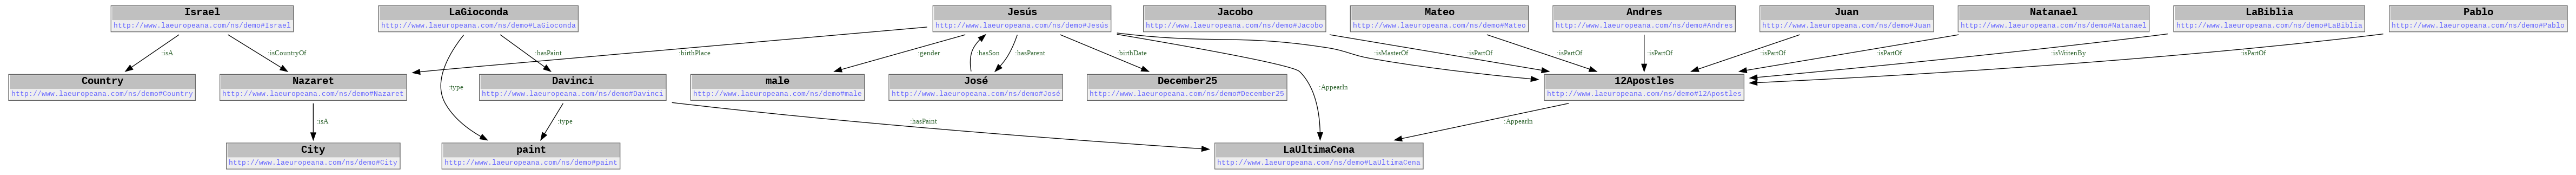

In [ ]:
visualize(g)


In [ ]:
type(g)

rdflib.graph.Graph